# Project 2

## Brandon Fernandes
## November 2025
#### This analysis focuses on:
##### How do the Devils’ overall standings metrics compare with the Rangers?

##### What is the Devils’ goal differential compared to the Rangers and the rest of the Metro division?

##### How do the Devils’ and Rangers’ power play and penalty kill percentages compare to each other and to the rest of the Metro Division?

##### How consistent is the Devils’ scoring compared to the Rangers relative to the division average?

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs
import time

In [10]:
url='https://www.hockey-reference.com/teams/NJD/'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")

<!DOCTYPE html>
<html class="no-js" data-root="/home/hr/build" data-version="klecko-" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
<link href="https://cdn.ssref.net/req/202511051" rel="dns-prefetch"/>
<script>
/* https://docs.osano.com/hc/en-us/articles/22469433444372-Google-Consent-Mode-v2  */
  window.dataLayer = window.dataLayer ||[];
      function gtag(){dataLayer.push(arguments);}
      gtag('consent','default',{
        'ad_storage':'denied',
        'analytics_storage':'denied',
        'ad_user_data':'denied',
        'ad_personalization':'denied',
        'personalization_storage':'denied',
        'functionality_storage':'granted',
        'security_storage':'granted',
        'wait_for_update': 500
      });
      gtag("set", "ads_data_redaction", true);
</script>
<script src="https://cmp.osano.com/16CGnCU8UtNhM14sg/12669873-8cf8-41e
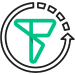
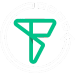

In [11]:
soup

<!DOCTYPE html>
<html class="no-js" data-root="/home/hr/build" data-version="klecko-" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
  <link href="https://cdn.ssref.net/req/202511051" rel="dns-prefetch"/>
  <script>
   /* https://docs.osano.com/hc/en-us/articles/22469433444372-Google-Consent-Mode-v2  */
  window.dataLayer = window.dataLayer ||[];
      function gtag(){dataLayer.push(arguments);}
      gtag('consent','default',{
        'ad_storage':'denied',
        'analytics_storage':'denied',
        'ad_user_data':'denied',
        'ad_personalization':'denied',
        'personalization_storage':'denied',
        'functionality_storage':'granted',
        'security_storage':'granted',
        'wait_for_update': 500
      });
      gtag("set", "ads_data_redaction", true);
  </script>
  <script src="https://cmp.osano.com/16CGnCU8UtNhM14sg
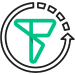
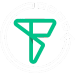

In [12]:
print(soup.prettify())

In [13]:
player_list = [ ]
stats_table = soup.find(id = 'all_player_stats').tbody
stats_table

<tbody><tr> <th class="right" csk="1" data-stat="ranker" scope="row">1</th> <td class="left" csk="Hughes Jack-1" data-append-csv="hugheja03" data-stat="name_display"><a href="/players/h/hugheja03.html">Jack Hughes</a></td> <td class="right" data-stat="age">24</td> <td class="left" data-stat="pos">C</td> <td class="right" data-stat="games">15</td> <td class="right" data-stat="goals">10</td> <td class="right" data-stat="assists">8</td> <td class="right" data-stat="points">18</td> <td class="right iz" data-stat="plus_minus">0</td> <td class="right iz" data-stat="pen_min">0</td> <td class="right" data-stat="goals_ev">9</td> <td class="right" data-stat="goals_pp">1</td> <td class="right iz" data-stat="goals_sh">0</td> <td class="right" data-stat="goals_gw">2</td> <td class="right" data-stat="assists_es">4</td> <td class="right" data-stat="assists_pp">4</td> <td class="right iz" data-stat="assists_sh">0</td> <td class="right" data-stat="shots">55</td> <td class="right" csk="0.1818181818" dat

In [14]:
player_list = [ ]
stats_table = soup.find(id ='all_player_stats').tbody

for row in stats_table.find_all('tr'):
    player = row.find(attrs={'data-stat':'name_display'}).text
    pos= row.find(attrs={'data-stat':'pos'}).text
    player_list.append({'name_display':player,'pos':pos})
print(player_list)

player_df = pd.DataFrame(player_list)
player_df

[{'name_display': 'Jack Hughes', 'pos': 'C'}, {'name_display': 'Dawson Mercer', 'pos': 'C'}, {'name_display': 'Jesper Bratt', 'pos': 'W'}, {'name_display': 'Nico Hischier', 'pos': 'C'}, {'name_display': 'Timo Meier', 'pos': 'RW'}, {'name_display': 'Simon Nemec', 'pos': 'D'}, {'name_display': 'Luke Hughes', 'pos': 'D'}, {'name_display': 'Dougie Hamilton', 'pos': 'D'}, {'name_display': 'Arseny Gritsyuk', 'pos': 'RW'}, {'name_display': 'Connor Brown', 'pos': 'RW'}, {'name_display': 'Brenden Dillon', 'pos': 'D'}, {'name_display': 'Luke Glendening', 'pos': 'C'}, {'name_display': 'Cody Glass', 'pos': 'C'}, {'name_display': 'Brett Pesce', 'pos': 'D'}, {'name_display': 'Jonas Siegenthaler', 'pos': 'D'}, {'name_display': 'OndÅ\x99ej PalÃ¡t', 'pos': 'LW'}, {'name_display': 'Paul Cotter', 'pos': 'C'}, {'name_display': 'Brian Halonen', 'pos': 'F'}, {'name_display': 'Dennis Cholowski', 'pos': 'D'}, {'name_display': 'Stefan Noesen', 'pos': 'RW'}, {'name_display': 'Jacob MarkstrÃ¶m', 'pos': 'G'}, {'n

,name_display,pos
0,Jack Hughes,C
1,Dawson Mercer,C
2,Jesper Bratt,W
3,Nico Hischier,C
4,Timo Meier,RW
5,Simon Nemec,D
6,Luke Hughes,D
7,Dougie Hamilton,D
8,Arseny Gritsyuk,RW
9,Connor Brown,RW


In [15]:
def get_players(soup):
    player_list = [ ]
    stats_table = soup.find(id ='all_player_stats').tbody
    for row in stats_table.find_all('tr'):
        player = row.find(attrs={'data-stat':'name_display'}).text
        pos= row.find(attrs={'data-stat':'pos'}).text
        player_list.append({'name_display':player,'pos':pos})
    return(player_list)

In [16]:
player_df = pd.DataFrame(get_players(soup))
player_df

,name_display,pos
0,Jack Hughes,C
1,Dawson Mercer,C
2,Jesper Bratt,W
3,Nico Hischier,C
4,Timo Meier,RW
5,Simon Nemec,D
6,Luke Hughes,D
7,Dougie Hamilton,D
8,Arseny Gritsyuk,RW
9,Connor Brown,RW


In [2]:
data = {
    "Team": ["Washington Capitals","Carolina Hurricanes","New Jersey Devils",
             "Columbus Blue Jackets","New York Rangers","Philadelphia Flyers",
             "Pittsburgh Penguins","New York Islanders"],
    "Wins": [51,47,42,40,39,35,34,33],
    "Losses":[22,30,33,33,36,39,36,38],
    "OTL":[9,5,7,9,7,8,12,11],
    "Points":[111,99,91,89,85,78,80,77],
    "GF":[288,266,242,273,256,235,242,230],
    "GA":[232,233,222,268,255,248,287,265]
}
df = pd.DataFrame(data)
df["Goal Differential"] = df["GF"] - df["GA"]
df["GF_per_Game"] = df["GF"]/82  # assuming 82 games
df

,Team,Wins,Losses,OTL,Points,GF,GA,Goal Differential,GF_per_Game
0,Washington Capitals,51,22,9,111,288,232,56,3.512195
1,Carolina Hurricanes,47,30,5,99,266,233,33,3.243902
2,New Jersey Devils,42,33,7,91,242,222,20,2.951220
3,Columbus Blue Jackets,40,33,9,89,273,268,5,3.329268
4,New York Rangers,39,36,7,85,256,255,1,3.121951
5,Philadelphia Flyers,35,39,8,78,235,248,-13,2.865854
6,Pittsburgh Penguins,34,36,12,80,242,287,-45,2.951220
7,New York Islanders,33,38,11,77,230,265,-35,2.804878


In [3]:
special = pd.DataFrame({
    "Team": ["New Jersey Devils","New York Rangers"],
    "PowerPlay%":[22.4,25.1],
    "PenaltyKill%":[80.4,82.2]
})
special

,Team,PowerPlay%,PenaltyKill%
0,New Jersey Devils,22.4,80.4
1,New York Rangers,25.1,82.2


### How do the Devils’ overall standings metrics (wins, losses, points) compare with the Rangers?

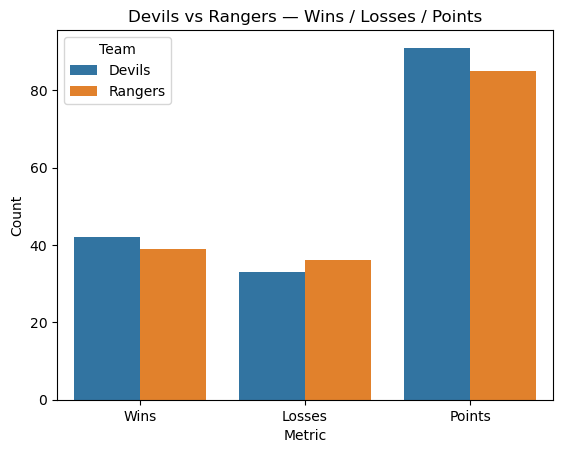

In [4]:
# Cell 4: Q1 - Wins/Losses/Points comparison
devils = df[df["Team"]=="New Jersey Devils"]
rangers = df[df["Team"]=="New York Rangers"]

compare = pd.DataFrame({
    "Metric":["Wins","Losses","Points"],
    "Devils":[int(devils["Wins"].iloc[0]), int(devils["Losses"].iloc[0]), int(devils["Points"].iloc[0])],
    "Rangers":[int(rangers["Wins"].iloc[0]), int(rangers["Losses"].iloc[0]), int(rangers["Points"].iloc[0])]
})

melt = compare.melt("Metric", var_name="Team", value_name="Value")
sns.barplot(data=melt, x="Metric", y="Value", hue="Team")
plt.title("Devils vs Rangers — Wins / Losses / Points")
plt.ylabel("Count")
plt.show()

### What is the Devils’ goal differential compared to the Rangers and the rest of the Metro division?

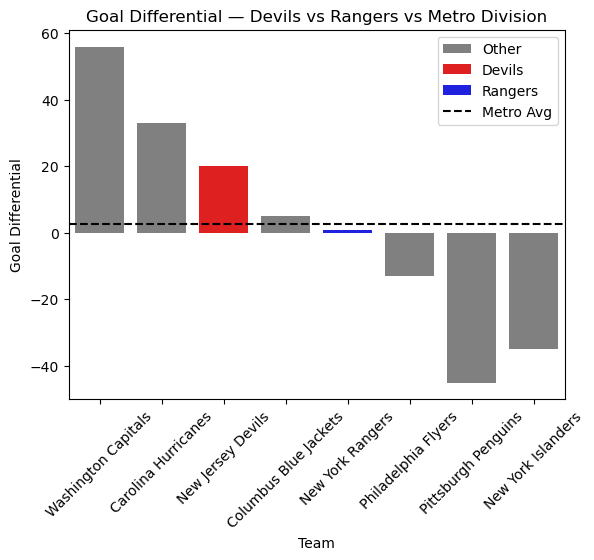

In [5]:
# Cell 5: Q2 - Goal Differential comparison
df["Color"] = df["Team"].apply(lambda t: "Devils" if t=="New Jersey Devils" else "Rangers" if t=="New York Rangers" else "Other")

sns.barplot(data=df, x="Team", y="Goal Differential", hue="Color", dodge=False, palette={"Devils":"red","Rangers":"blue","Other":"gray"})
plt.axhline(df["Goal Differential"].mean(), color="black", linestyle="--", label="Metro Avg")
plt.title("Goal Differential — Devils vs Rangers vs Metro Division")
plt.ylabel("Goal Differential")
plt.xticks(rotation=45)
plt.legend()
plt.show()

### How do the Devils’ and Rangers’ power play and penalty kill percentages compare to each other and to the rest of the Metro Division?

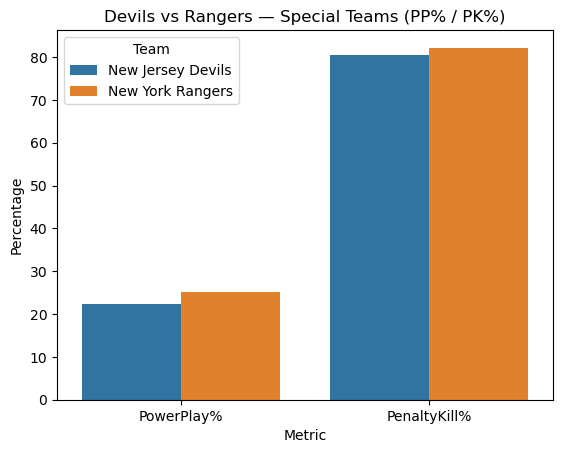

In [6]:
# Cell 6: Q3 - Power Play and Penalty Kill
melt = special.melt("Team", var_name="Metric", value_name="Percentage")
sns.barplot(data=melt, x="Metric", y="Percentage", hue="Team")
plt.title("Devils vs Rangers — Special Teams (PP% / PK%)")
plt.ylabel("Percentage")
plt.show()

### How consistent is the Devils’ scoring compared to the Rangers (goals per game) relative to the division average?

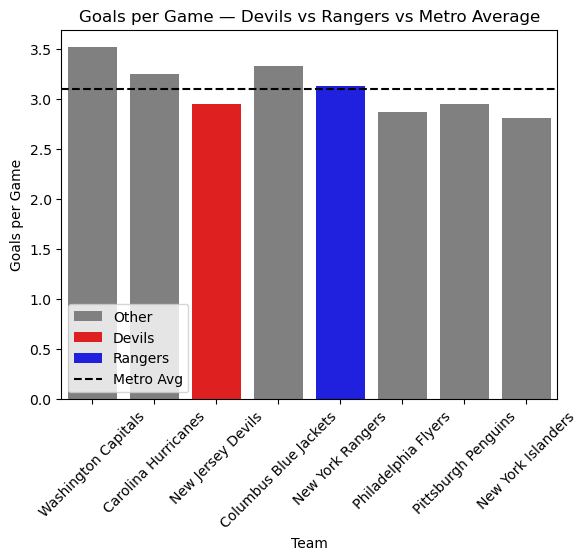

In [7]:
# Cell 7: Q4 - Goals per Game vs Metro average
sns.barplot(data=df, x="Team", y="GF_per_Game", hue="Color", dodge=False, palette={"Devils":"red","Rangers":"blue","Other":"gray"})
plt.axhline(df["GF_per_Game"].mean(), color="black", linestyle="--", label="Metro Avg")
plt.title("Goals per Game — Devils vs Rangers vs Metro Average")
plt.ylabel("Goals per Game")
plt.xticks(rotation=45)
plt.legend()
plt.show()